## Final Project Submission

Please fill out:
* Student name: Rotich Naomi Chesang
* Student pace: part time 
* Scheduled project review date/time: 9.00 pm, 26/03/2023.
* Instructor name: Samwel Jane


## Project title
Predicting House Prices in King County: A Machine Learning Approach

### Background
Housing has been a basic human need for centuries, and over time, the concept of housing has evolved with the changing needs and lifestyles of people. Lately, people have commercilized housing aiming at maximum income generation. Different variables however can significantly  impact the overall value of a property in different magnitudes.


### Project overview
For this project, I  will use regression modeling to analyze house sales in a northwestern county.

### Business problem
Homeowners often seek ways to increase the value of their property, and renovations can be an effective way to achieve this. Therefore, there is a need for a reliable way to estimate the impact of home renovations on property value to help homeowners make informed decisions.


### Main objective
To provide advice to homeowners about how different variables might increase the estimated value of their homes, and by what amount.

### Specific objectives.
To build a predictive model that can accurately estimate the sale price of houses in King County based on their various features such as number of bedrooms, bathrooms, square footage, location, and others.

To identify the key features that have the most significant impact on the sale price of houses in King County and provide actionable insights to real estate agents, property developers, and homeowners on how to maximize the value of their properties.

### Data understanding
The King County House Sales dataset contains information on the sale of houses in King County, Washington, USA between May 2014 and May 2015. The dataset includes 21,597 observations and 19 variables. The variables in the dataset include information about the houses, such as the number of bedrooms, bathrooms, and square footage, as well as information about the sale, such as the sale price, date of sale, and condition of the house. There are also variables that describe the location of the house, such as the zip code, latitude, and longitude. The dataset provides a good opportunity to study the factors that affect house prices in the King County area, and to develop predictive models for house prices based on these factors. 
* The dataset King County House Sales dataset, which can be found in http://localhost:8888/edit/data/kc_house_data.csv in the data folder in this repo.
* The data description (column names) are also found in http://localhost:8888/edit/data/column_names.md.


In [1]:
# Importing libraries.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats

# Statistical anlysis and machine learning.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge





In [2]:
# Importing data
house = pd.read_csv('kc_house_data.csv', index_col=0)
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


###  Data cleaning

In [3]:
# Checking data types to ensure usage of correct data types
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

#### Data cleaning

In [4]:
# Dropping some columns to aquire the desired columns for the specific objectives
# renaming the dataset df to avoid confusion
df = house.drop(['date', 'view','sqft_basement','yr_renovated','sqft_living15','sqft_lot15','sqft_above','lat','long','zipcode'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [5]:
# checking for missing values
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [6]:
# inspecting the waterfront column
print(df['waterfront'].value_counts())
print(df['waterfront'].unique())


0.0    19075
1.0      146
Name: waterfront, dtype: int64
[nan  0.  1.]


We consider dropping the missing values in the waterfront column because it's negligible and cannot affect the performance of our dataset. we also notice that the variable is encoded in three parts, the nan, 1 and 0. We must drop the nan because it has no significant impact on our data.

In [7]:
# dropping missing values
df.dropna(subset=['waterfront'], inplace=True)
df.dropna(inplace = True)
df['waterfront'] = df['waterfront'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 6414100192 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   bathrooms    19221 non-null  float64
 3   sqft_living  19221 non-null  int64  
 4   sqft_lot     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  int32  
 7   condition    19221 non-null  int64  
 8   grade        19221 non-null  int64  
 9   yr_built     19221 non-null  int64  
dtypes: float64(3), int32(1), int64(6)
memory usage: 1.5 MB
None


In [8]:
# confirmng the dropped vlaues
print(df['waterfront'].unique())

[0 1]


In [9]:
# inspeting the data to check is there is any missing values
print(df.shape)
print(df.info())

(19221, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 6414100192 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   bathrooms    19221 non-null  float64
 3   sqft_living  19221 non-null  int64  
 4   sqft_lot     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  int32  
 7   condition    19221 non-null  int64  
 8   grade        19221 non-null  int64  
 9   yr_built     19221 non-null  int64  
dtypes: float64(3), int32(1), int64(6)
memory usage: 1.5 MB
None


In [10]:
# overall statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,3.409968,7.661048,1971.039800
std,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.650280,1.175998,29.384666
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


#### Multicollinearity

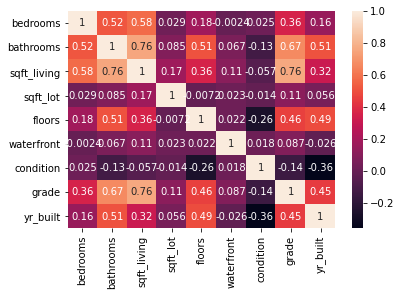

In [11]:
# checking for multicollinearity
# we can use a heatmap to visualize how the variables are correlated

# select the features to include in the correlation matrix
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade','yr_built']

# create a correlation matrix
corr = df[features].corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr, annot= True)
plt.show()

The heatmat shows that bathroom, sqft_living and grade are highly correlated with a value above .75.this could affect our model. We can further explore the multicollinearity using the correlation matrix bellow

In [12]:
# Creating a new dataframe containing the independant variables
df_mult = df.iloc[:,1:10]
df_mult.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,
6414100192,3,2.25,2570,7242,2.0,0,3,7,1951
5631500400,2,1.00,770,10000,1.0,0,3,6,1933
2487200875,4,3.00,1960,5000,1.0,0,5,7,1965
1954400510,3,2.00,1680,8080,1.0,0,3,8,1987
7237550310,4,4.50,5420,101930,1.0,0,3,11,2001


In [13]:
# correlation matrix
df_mult.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,1.000000,0.516188,0.578211,0.029407,0.182396,-0.002386,0.025059,0.360014,0.157512
bathrooms,0.516188,1.000000,0.756341,0.085094,0.506214,0.067282,-0.126427,0.666891,0.507014
sqft_living,0.578211,0.756341,1.000000,0.173345,0.357184,0.110230,-0.057467,0.764053,0.317443
sqft_lot,0.029407,0.085094,0.173345,1.000000,-0.007246,0.023143,-0.014113,0.114577,0.055873
floors,0.182396,0.506214,0.357184,-0.007246,1.000000,0.021883,-0.263491,0.458117,0.490252
waterfront,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.017642,0.087383,-0.026079
condition,0.025059,-0.126427,-0.057467,-0.014113,-0.263491,0.017642,1.000000,-0.144513,-0.361984
grade,0.360014,0.666891,0.764053,0.114577,0.458117,0.087383,-0.144513,1.000000,0.446299
yr_built,0.157512,0.507014,0.317443,0.055873,0.490252,-0.026079,-0.361984,0.446299,1.000000


In [14]:
# Return True for positive or negative correlations that are bigger than 0.75 in the correlation matrix
abs(df_mult.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,True,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,True,False,False
grade,False,False,True,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,True


In [15]:
#  create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.
df1 = df_mult.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# set index to pairs
df1.set_index(['pairs'], inplace = True)

#d rop level columns
df1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df1.drop_duplicates(inplace=True)


In [16]:
df1[(df1.cc>.75) & (df1.cc <1)]

,cc
pairs,
"(sqft_living, grade)",0.764053
"(bathrooms, sqft_living)",0.756341


The above outcome confirms the previous inference that  variables 'sqft_living, grade', and 'bathrooms' so highly correlated, so we can  remove sqft_living because it causes multicolinearity for the two variables.

In [17]:
# dropping 'sqft_living'
df_mult = df_mult.drop(['sqft_living'], axis = 1)
df_mult.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,
6414100192,3,2.25,7242,2.0,0,3,7,1951
5631500400,2,1.00,10000,1.0,0,3,6,1933
2487200875,4,3.00,5000,1.0,0,5,7,1965
1954400510,3,2.00,8080,1.0,0,3,8,1987
7237550310,4,4.50,101930,1.0,0,3,11,2001


Now that we've dealt with multicollinearity, we can add the price to the new dataframe

In [18]:
# Adding price to the new dataframe
df1 = pd.DataFrame([])
df1['price'] = df['price']
df1['sqft_lot'] = df_mult['sqft_lot']
df1['bedrooms'] = df_mult['bedrooms']
df1['grade'] = df_mult['grade']
df1['bathrooms'] = df_mult['bathrooms']
df1['floors'] = df_mult['floors']
df1['waterfront'] = df_mult['waterfront']
df1['condition'] = df_mult['condition']
df1['yr_built'] = df_mult['yr_built']
df1.head()

,price,sqft_lot,bedrooms,grade,bathrooms,floors,waterfront,condition,yr_built
id,,,,,,,,,
6414100192,538000.0,7242,3,7,2.25,2.0,0,3,1951
5631500400,180000.0,10000,2,6,1.00,1.0,0,3,1933
2487200875,604000.0,5000,4,7,3.00,1.0,0,5,1965
1954400510,510000.0,8080,3,8,2.00,1.0,0,3,1987
7237550310,1230000.0,101930,4,11,4.50,1.0,0,3,2001


#### Data normalization

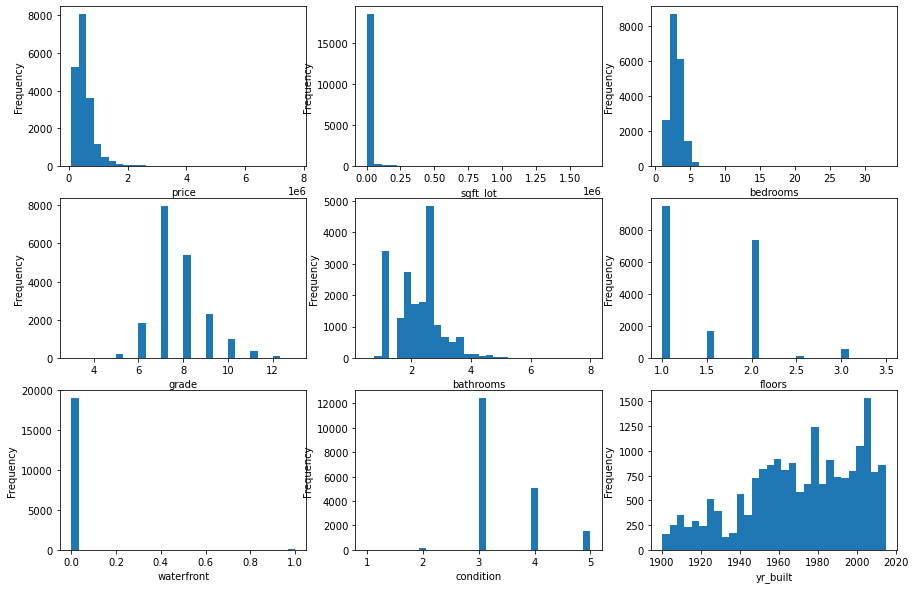

In [19]:
# checking distributions of the variables before normalization

# Select variables to plot
vars_to_plot = ['price', 'sqft_lot', 'bedrooms', 'grade', 'bathrooms', 'floors', 'waterfront', 'condition', 'yr_built']

# Create a figure with 9 subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

# Plot the histograms
for i, var in enumerate(vars_to_plot):
    axs[i].hist(df[var], bins=30)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')


From the histograms, we notice the prescence of continuous(price and sqft_lot)  and categorical (bedrooms, grade,bathrooms, floors, waterfront, condition and yr_built) variables. Skeweness (positive) is also evident in the continuous variables, this will necesitate tranformations and scaling of variables to achieve normally distributed and a fair scale for the dataset.

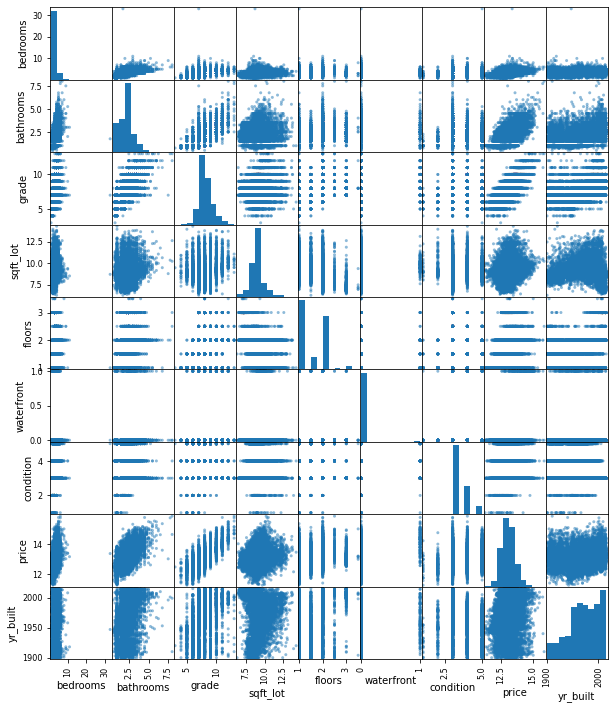

In [20]:
#Tranforming the non normal features
x_cols = ['bedrooms','bathrooms', 'grade', 'sqft_lot', 'floors','waterfront', 'condition','price','yr_built']
non_normal = ['sqft_lot', 'price']
for feat in non_normal:
    df1[feat] = df1[feat].map(lambda x: np.log(x))
# visualizing distribution after normalization of continous variables    
pd.plotting.scatter_matrix(df1[x_cols], figsize=(10,12));

### Univariate analysis

count    19221.000000
mean        13.049567
std          0.527405
min         11.264464
25%         12.682307
50%         13.017003
75%         13.375454
max         15.856731
Name: price, dtype: float64


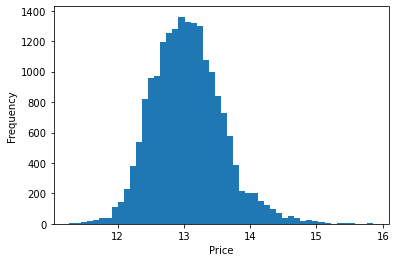

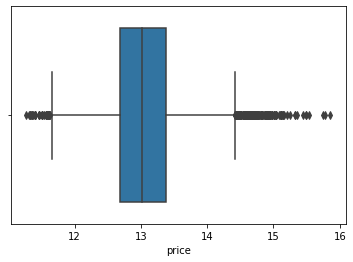

Skewness: 0.45014475406259036
Kurtosis: 0.7230205814715185


In [21]:
# Describe the target variable (price)
print(df1['price'].describe())

# Create a histogram of the target variable
plt.hist(df1['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a boxplot of the target variable
sns.boxplot(x=df1['price'])
plt.show()

# Calculate and display skewness and kurtosis of the target variable
print('Skewness:', df1['price'].skew())
print('Kurtosis:', df1['price'].kurt())

The skewness value of 0.45 indicates that the distribution of the data is slightly skewed to the right, meaning that there are more outliers on the right side of the distribution. The kurtosis value of 0.72 indicates that the distribution is platykurtic, which means that it has fewer outliers and is less peaked compared to a normal distribution. Overall, these values suggest that the data is relatively normally distributed and doesn't have any extreme outliers.

In [22]:
# the minumum and maximum price of houses
print(df1['price'].min())
print(df1['price'].max())

11.26446410567173
15.856730886823913


In [23]:
# inspecting the categorical variables
cat_var = ['condition', 'grade', 'waterfront', 'floors', 'bedrooms', 'bathrooms']
for var in cat_var:
    print(df1[var].unique())
    print(df1[var].nunique())
    print(df1[var].value_counts())
    print('Skewness:', df1[var].skew())
    print('Kurtosis:', df1[var].kurt())

[3 5 4 1 2]
5
3    12474
4     5058
5     1512
2      152
1       25
Name: condition, dtype: int64
Skewness: 1.0372817799020122
Kurtosis: 0.5137270776196581
[ 7  6  8 11  9  5 10 12  4  3 13]
11
7     7974
8     5409
9     2320
6     1810
10    1018
11     357
5      212
12      82
4       25
13      13
3        1
Name: grade, dtype: int64
Skewness: 0.7950656543824148
Kurtosis: 1.1598863852403176
[0 1]
2
0    19075
1      146
Name: waterfront, dtype: int64
Skewness: 11.343651203082114
Kurtosis: 126.69160523014672
[2.  1.  1.5 3.  2.5 3.5]
6
1.0    9493
2.0    7350
1.5    1681
3.0     546
2.5     145
3.5       6
Name: floors, dtype: int64
Skewness: 0.6112956907738468
Kurtosis: -0.497634499576872
[ 3  2  4  5  1  6  7  8  9 11 10 33]
12
3     8721
4     6149
2     2451
5     1441
6      227
1      175
7       35
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Skewness: 2.1950322134730444
Kurtosis: 55.30738117994404
[2.25 1.   3.   2.   4.5  1.5  2.5  1

In [24]:
df1['bedrooms'].value_counts()

3     8721
4     6149
2     2451
5     1441
6      227
1      175
7       35
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

It is worth noting the variable bedrooms has an outlier of 33 rooms which has a relatively low price, which apparently skews our data. This could be a mistake made during data entry. Therefore dropping it will be wise.

In [25]:
# dropping bedrooms outlier
df1 = df1.drop(df1[df1['bedrooms'] == 33].index)
df1['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

#### Bivariate analysis
This is anlysis between two variables in the data.

In [26]:
# checking the the relationship between the dependant (price) and independant variables

#list of columns to check the distribution
hist_columns = ['bedrooms','bathrooms', 'grade','sqft_lot','floors','waterfront','condition','grade','yr_built']
# create a scatter matrix for all numeric variables in the dataset in relation to price
def scatter_plots(data,columns):
    num_plots = min(len(columns), 8)
    fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(20,30))
    for i,var in enumerate(columns[:num_plots]):
        ax = axes[i //2,i % 2]
        ax.scatter(data[var],data['price'],alpha = 0.5)
        ax.set_xlabel(var)
        ax.set_ylabel('price')
        ax.set_title(f'{var} vs price')
    for i in range(num_plots, 8):
        axes[i // 2, i % 2].set_visible(False)
    plt.tight_layout()
    plt.show()

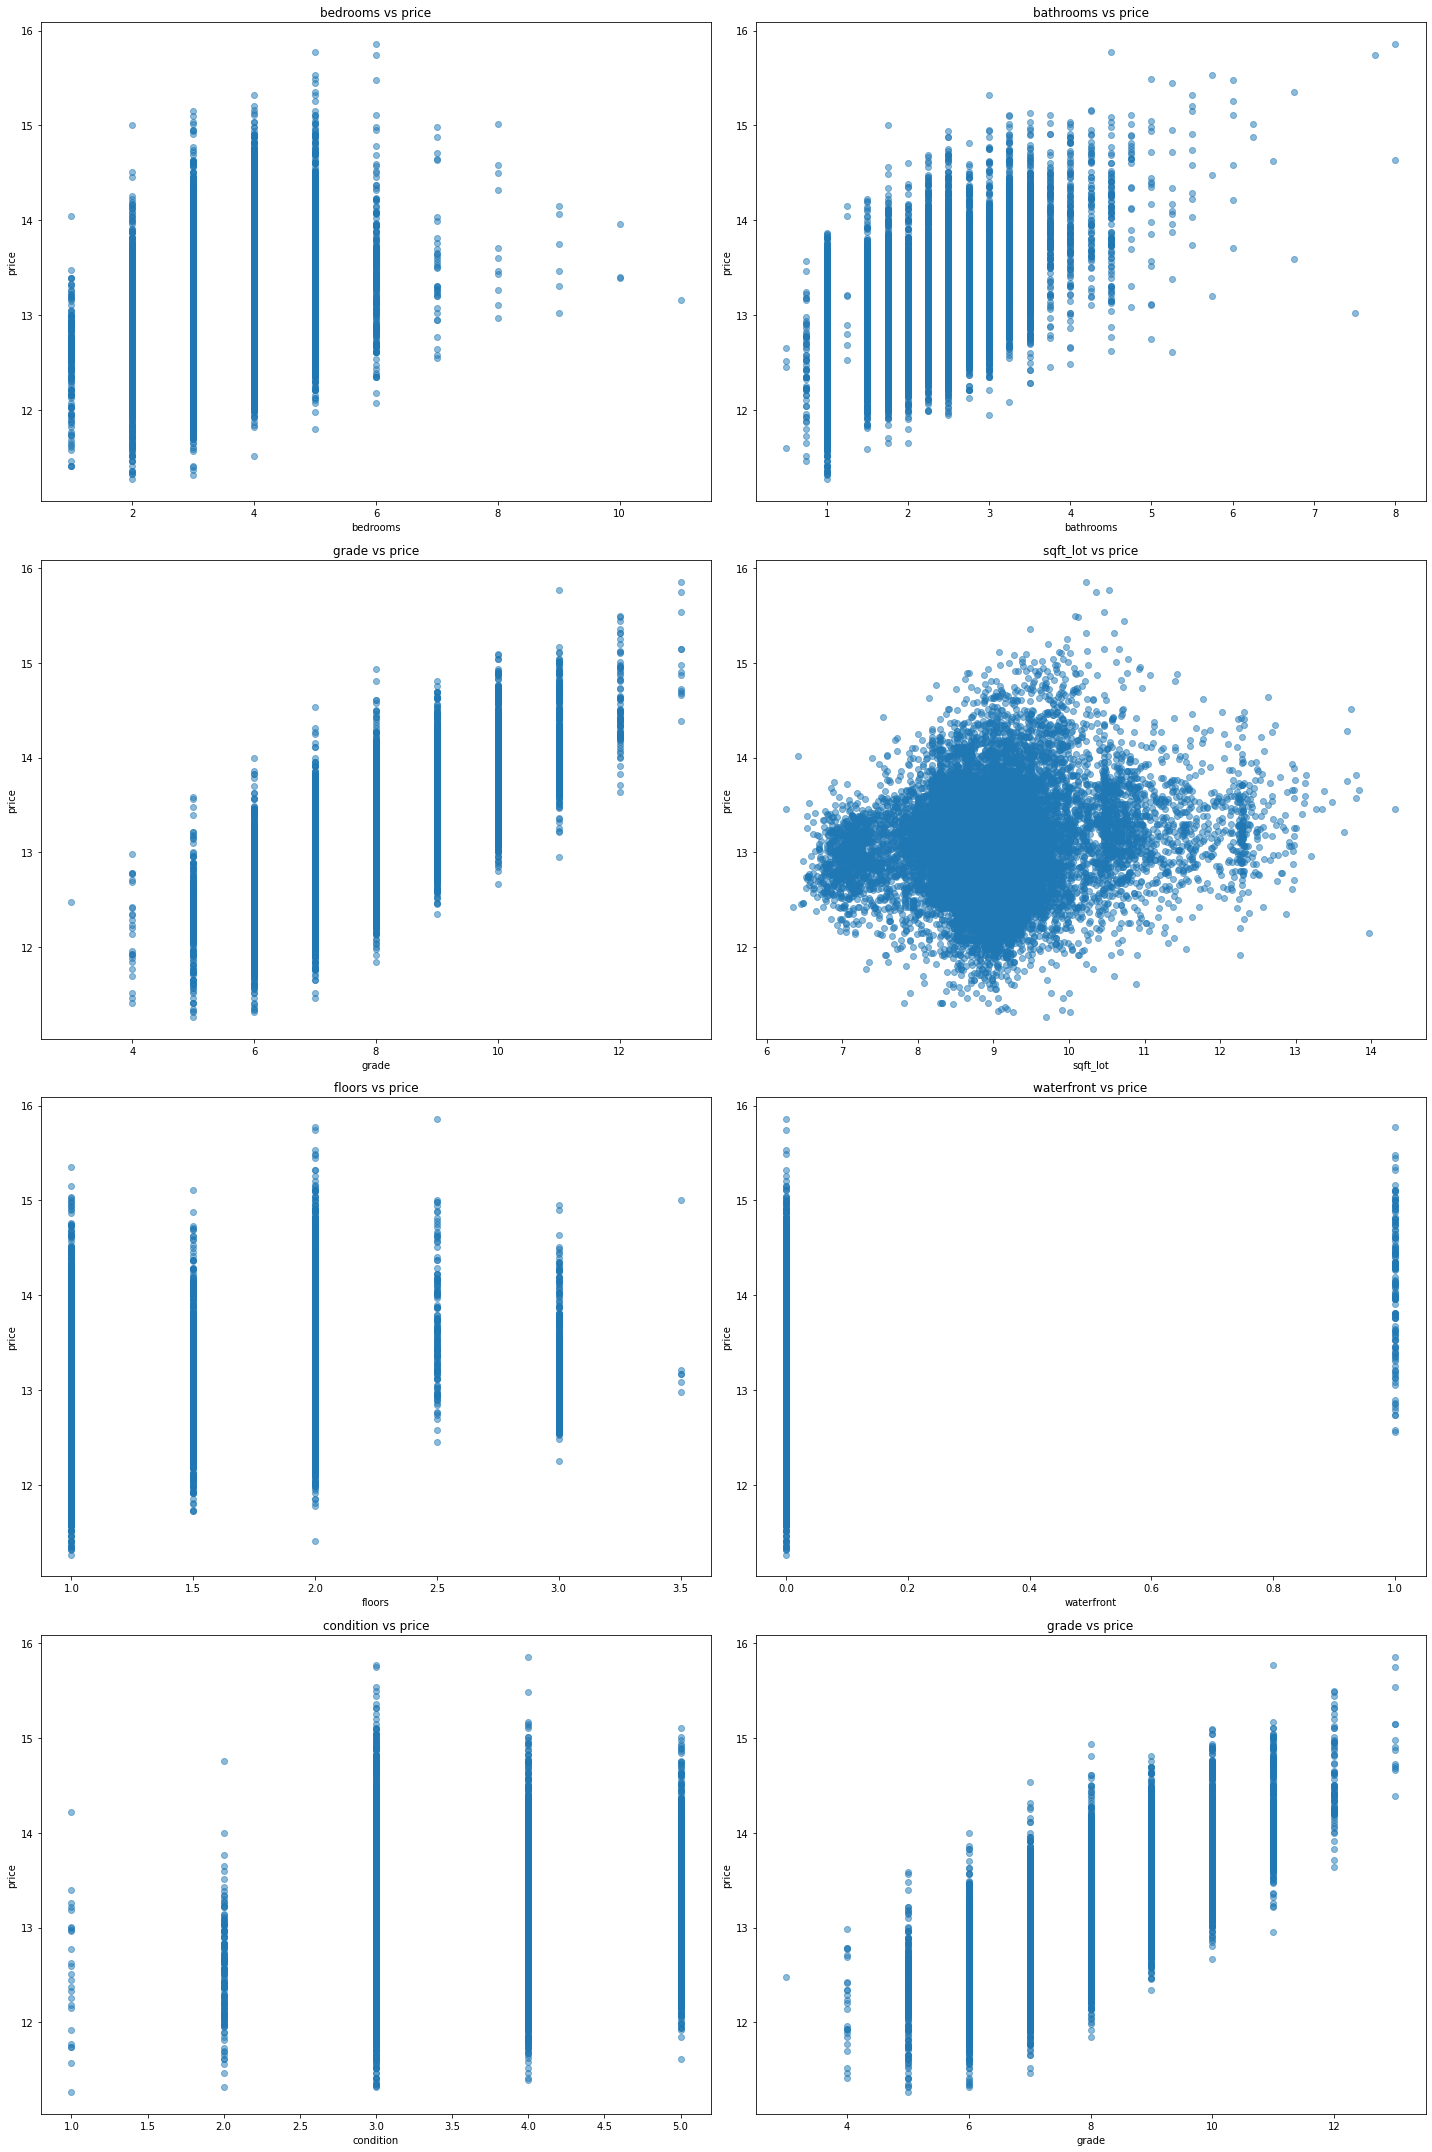

In [27]:
scatter_plots(df1,hist_columns)

In [28]:
df1.head()

,price,sqft_lot,bedrooms,grade,bathrooms,floors,waterfront,condition,yr_built
id,,,,,,,,,
6414100192,13.195614,8.887653,3,7,2.25,2.0,0,3,1951
5631500400,12.100712,9.210340,2,6,1.00,1.0,0,3,1933
2487200875,13.311329,8.517193,4,7,3.00,1.0,0,5,1965
1954400510,13.142166,8.997147,3,8,2.00,1.0,0,3,1987
7237550310,14.022525,11.532042,4,11,4.50,1.0,0,3,2001


### Modelling

In [29]:
# checking the corelation
df1.corr()['price'].sort_values(ascending=False)


price         1.000000
grade         0.704877
bathrooms     0.552219
bedrooms      0.353289
floors        0.313838
waterfront    0.180529
sqft_lot      0.137762
yr_built      0.081958
condition     0.039044
Name: price, dtype: float64

* Based on the correlation coefficients provided, it appears that the "grade" and "bathrooms" variables are most related to the dependent variable "price." A correlation coefficient of 0.70 suggests a strong positive relationship between "grade" and "price," which implies that higher grades (higher quality) are associated with higher prices. Similarly, a correlation coefficient of 0.55 indicates a moderate positive relationship between "bathrooms" and "price," which suggests that the number of bathrooms in a house is positively associated with its price.

* The "bedrooms" and "floors" variables also show some positive correlation with "price," but to a lesser extent than "grade" and "bathrooms." In contrast, the "condition" and "yr_built" variables have low correlation coefficients (0.04 and 0.08, respectively), suggesting a weak relationship with "price." The "waterfront" and "sqft_lot" variables also show some positive correlation with "price," but these relationships are relatively weaker than the other variables mentioned above.

The predicted values are : [12.84056958 12.52445067 12.84056958 ... 13.1566885  12.84056958
 12.84056958]
R-sqd for the linear regression model is : 0.49685155281472115


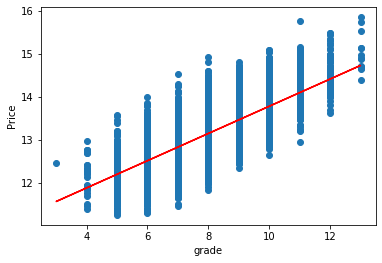

In [30]:
# model one
#  simpleLinear regression
X = df1[['grade']]
y = df1['price']
# Create a linear regression object
model0 = LinearRegression()

# Fit the model to the data
model0.fit(X, y)

# predict output y_pred from input x
y_pred = model0.predict(X)

# model performance
print('The predicted values are : ' + str(model0.predict(X)))
print('R-sqd for the linear regression model is : ' + str(model0.score(X,y)))


# Plot the regression line
plt.scatter(X, y)
plt.plot(X, model0.predict(X), color='red')
plt.xlabel('grade')
plt.ylabel('Price')
plt.show()

From the above regression we can see that only 49.68% of the price variation is explained by the model, we can also look at other variables to see how it affects price variation

In [31]:
# Model0 regression equation
# Get the regression coefficients
b0 = model0.intercept_
b1 = model0.coef_

# Print the regression equation
print(f"The regression equation is: Price = {b0:.2f} + {b1[0]:.2f} * Grade")



The regression equation is: Price = 10.63 + 0.32 * Grade


##### Regression equation interpretation
* According to the equation, for every one unit increase in grade, we can expect the price of the house to increase by 0.32 units.
* The intercept in the equation (10.63) represents the price of a house with a grade of zero

R-sqd for the linear regression model is : 0.00671712509792588


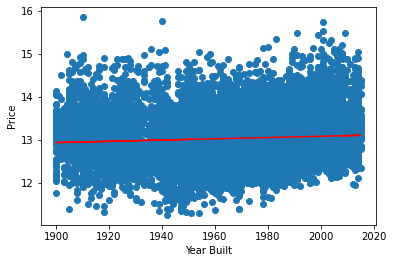

In [32]:
# model two
# simple linear regression using scikit learn
X = df1[['yr_built']]
y = df1['price']
# Create a linear regression object
model1 = LinearRegression()

# Fit the model to the data
model1.fit(X, y)

#evaluate the model
print('R-sqd for the linear regression model is : ' + str(model1.score(X,y)))


y_pred = model1.predict(X)
# Plot the regression line
plt.scatter(X, y)
plt.plot(X, model1.predict(X), color='red')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

This model explains less than 1% of the variation in price, therefore a better model is required for better outcome.

In [33]:
# Model1 regression equation
# Get the regression coefficients
b0 = model1.intercept_
b1 = model1.coef_

# Print the regression equation
print(f"The regression equation is: Price = {b0:.2f} + {b1[0]:.3f} * yr_built")


The regression equation is: Price = 10.15 + 0.001 * yr_built


#### Regression equation interpretation
* for every one unit increase in the year the house was built, we can expect the price of the house to increase by 0.001 units.
* The intercept in the equation (10.15) represents the price of a house that was built in the year zero, which is not possible. Therefore, this intercept value may not have a practical interpretation in this context.

The above models involve simple linear regression, which only has two variables, the dependant(price) and independant variable, grade for the first model and yr_buit for the second model. We could see how they relate from the interpretations above. However the two do not explicitly explain the situation at hand, therefore, investigating more variables can explain ho other variables affect price. we can do this by trying other modified models. 

In [34]:
# Model three
# performing multiple regression

# Gouping the dataset into two, dependant and independant variables
y = df1['price']
X = df1.drop(['price'], axis=1)

# Get a list of column names
cols = X.columns.tolist()

# Join the column names into a string with a "+" sign between them
formula = f"price ~ {' + '.join(cols)}"

model2 = ols(formula=formula, data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     3904.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:02:00   Log-Likelihood:                -5697.3
No. Observations:               19220   AIC:                         1.141e+04
Df Residuals:                   19211   BIC:                         1.148e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6001      0.204    110.699      0.000      22.200      23.000
sqft_lot      -0.0072      0.003     -2.496      0.013      -0.013      -0.002
bedrooms       0.0140      0.003      4.460      0.000       0.008       0.020
grade          0.2966      0.003    104.646      0.000       0.291       0.302
bathrooms      0.1686      0.005     34.175      0.000       0.159       0.178
floors         0.0615      0.006     10.596      0.000       0.050       0.073
waterfront     0.5814      0.027     21.258      0.000       0.528       0.635
condition      0.0438      0.004     11.152      0.000       0.036       0.052
yr_built      -0.0063      0.000    -60.586      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       64.338   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.489
Skew:                          -0.037   Prob(JB):                     7.42e-19
Kurtosis:                       3.314   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretation
*  The R-squared value of 0.619 indicates that approximately 62% of the variance in the price can be explained by the predictor variables.
* The coefficients in the table show the estimated effect of each predictor variable on the price, holding all other predictors constant. For example, for a one-unit increase in grade, the price is estimated to increase by 0.2966.
* The p-values in the table (P>|t|) indicate the statistical significance of each predictor variable. All predictor variables have p-values less than 0.05, indicating that they are significantly related to the price.


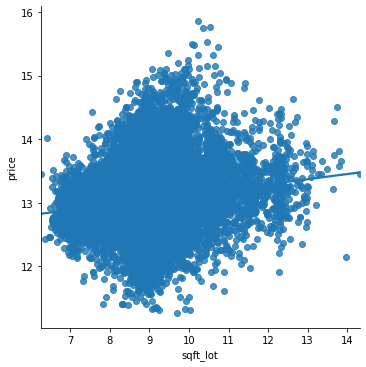

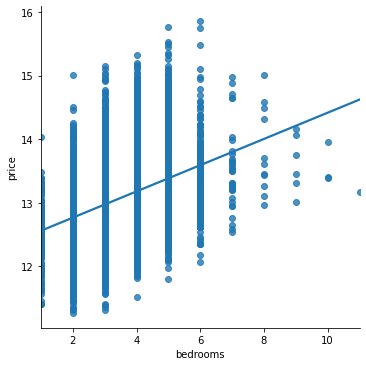

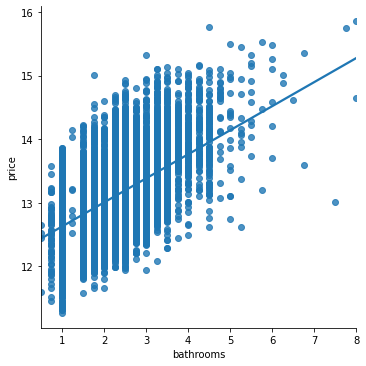

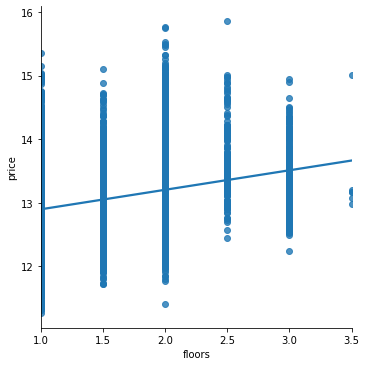

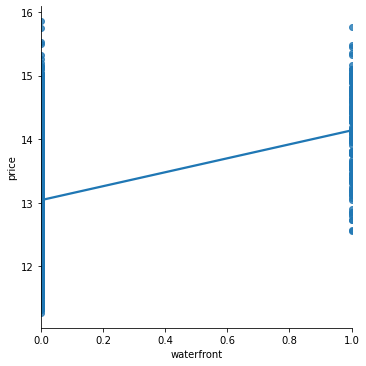

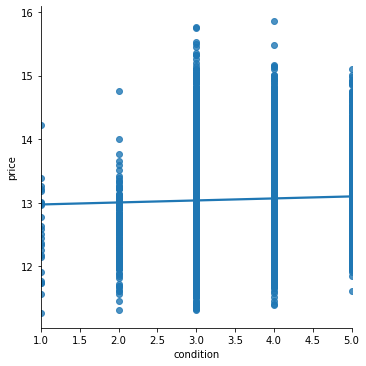

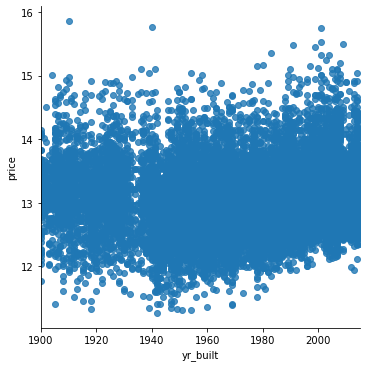

In [35]:

# Create a regression plot of the model with multiple lines of best fit
sns.lmplot(x='sqft_lot', y='price', data=df1, ci=None)
sns.lmplot(x='bedrooms', y='price', data=df1, ci=None)
sns.lmplot(x='bathrooms', y='price', data=df1, ci=None)
sns.lmplot(x='floors', y='price', data=df1, ci=None)
sns.lmplot(x='waterfront', y='price', data=df1, ci=None)
sns.lmplot(x='condition', y='price', data=df1, ci=None)
sns.lmplot(x='yr_built', y='price', data=df1, ci=None)

# Show the plot
plt.show()


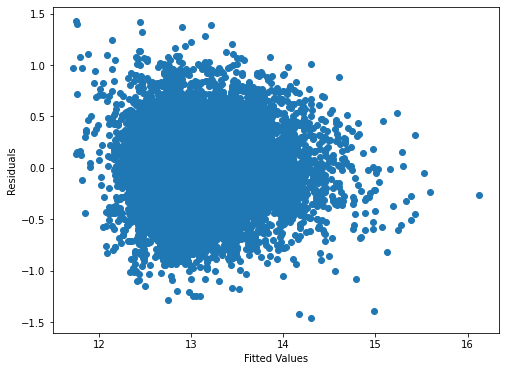

In [36]:
# residual plot to visualize the residuals
# Gouping the dataset into two, dependant and independant variables
y = df1['price']
X = df1.drop(['price'], axis=1)

# Get a list of column names
cols = X.columns.tolist()

# Join the column names into a string with a "+" sign between them
formula = f"price ~ {' + '.join(cols)}"

model2 = sm.formula.ols(formula=formula, data=df1).fit()

# Plot residual plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(model2.fittedvalues, model2.resid)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.show()

The residuals does not depict any pattern so our data is okay.

In [37]:
# The model equation

# instantiate the Linear model
model2 = LinearRegression()

# Use the method fit to train the model with input data x and output y
model2.fit(X, y)

# Use the trained model to predict output y_pred from input x
y_pred = model2.predict(X)

# print the equation of the regression line
# print the regression equation
coef_list = list(model2.coef_)
variable_list = list(X.columns)
eq = 'price = ' + str(round(model2.intercept_, 3)) + ' + '
for i in range(len(coef_list)):
    eq += str(round(coef_list[i], 3)) + '*' + variable_list[i] + ' + '
print(eq[:-3])

price = 22.6 + -0.007*sqft_lot + 0.014*bedrooms + 0.297*grade + 0.169*bathrooms + 0.062*floors + 0.581*waterfront + 0.044*condition + -0.006*yr_built


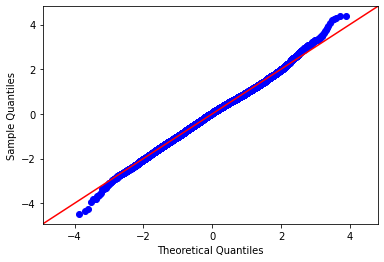

In [38]:
# visualize normality using Q-Q plots
# Gouping the dataset into two, dependant and independant variables
y = df1['price']
X = df1.drop(['price'], axis=1)

# Get a list of column names
cols = X.columns.tolist()

# Join the column names into a string with a "+" sign between them
formula = f"price ~ {' + '.join(cols)}"

model2 = sm.formula.ols(formula=formula, data=df1).fit()

# visualize normality using Q-Q plots
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True)

* The Q-Q plot above also confirms that the variables are normal.

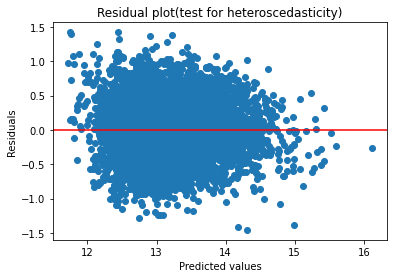

In [39]:
# checking for heteroscedasticity

# Get predicted values from the model
y_pred = model2.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals vs. predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot(test for heteroscedasticity)')
plt.show()

The plot also shows homoscedasticity in our dataset.

In [40]:
# Perform the Goldfeld-Quandt Test
gq_test = sms.het_goldfeldquandt(model2.resid, model2.model.exog)

# Print the test results
print('F-statistic:', gq_test[0])
print('p-value:', gq_test[1])

F-statistic: 0.9780852072690855
p-value: 0.8611624800644179


In this case, the F-statistic is 0.9780852072690855 and the p-value is 0.8611624800644179. Since the p-value is greater than 0.05 (assuming a significance level of 0.05), we fail to reject the null hypothesis and conclude that there is no evidence of heteroskedasticity in the model.

From the Residual plot (test for heteroscedasticity) and the Goldfeld-Quandt Test, our variables are homoscedastic thus fulfilling the assumptions of a linear regression model.

Since the model only explains 62% variation of price by predictors, we can try a different model where the available dataset is divided into two parts The training set is used to train the model, while the testing set is used to evaluate the performance of the model. This type of model allows us to evaluate the model's performance, prevent overfitting, tune hyperparameters, and identify data issues.

Train R-squared: 0.6430815463918367
Test R-squared: 0.6449536912791446


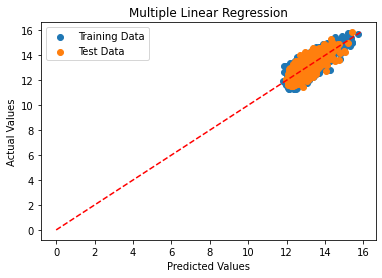

In [41]:
# model four

# select variables
continuous = ['sqft_lot']
categoricals = ['bedrooms', 'bathrooms', 'floors','grade','waterfront','condition','yr_built']
target = 'price'
X = df1[continuous + categoricals]
y = df1[target]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# one-hot encoding of categorical variables
ohe = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categoricals)
], remainder='passthrough')

# fit and transform train data
X_train_enc = ohe.fit_transform(X_train)

# transform test data
X_test_enc = ohe.transform(X_test)

# instantiate linear regression model
linreg = LinearRegression()

# fit model to train data
linreg.fit(X_train_enc, y_train)

# predict on train and test data
y_train_pred = linreg.predict(X_train_enc)
y_test_pred = linreg.predict(X_test_enc)

# evaluate model using r squared metric
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Train R-squared:', train_r2)
print('Test R-squared:', test_r2)

# visualize model by plotting predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_train_pred, y_train, label='Training Data')
ax.scatter(y_test_pred, y_test, label='Test Data')
ax.plot([0, np.max(y)], [0, np.max(y)], linestyle='--', color='r')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Multiple Linear Regression')
ax.legend()
plt.show()


Here the test set performed beter than the train set. Such that approximately 64.5% of the variance in the price can be explained by the predictor variables. However this seems to explain the model well, we can try a polynomial regression model that can be a better fit for non-linear relationships, Greater flexibility, interpretability and are Widely used.

In [42]:
# Model five

# Define the continuous and categorical variables
continuous = ['sqft_lot']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'grade', 'waterfront', 'condition', 'yr_built']

# Split the data into features and target variable
X = df1[continuous + categoricals]
y = df1['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# sc = StandardScaler()
# X_train[continuous] = sc.fit_transform(X_train[continuous])
# X_test[continuous] = sc.transform(X_test[continuous])

# Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

# Make predictions on training and test sets
y_train_pred = regressor.predict(X_train_poly)
y_test_pred = regressor.predict(X_test_poly)

# Compute R-squared values for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R-squared values
print(f"R-squared (training set): {r2_train:.4f}")
print(f"R-squared (test set): {r2_test:.4f}")


R-squared (training set): 0.6499
R-squared (test set): 0.6527


* The model above is a polynomial regression model with a degree of 3, which attempts to predict the house price in King County based on several continuous and categorical variables such as 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'grade', 'waterfront', 'condition', and 'yr_built'. The model is trained on the training set and evaluated on the test set using the R-squared metric.
* Model captures more complex relationships between the features and the target variable, leading to potentially better predictions
* Inclusion of categorical variables such as 'waterfront' and 'condition' can also help improve the model's accuracy by accounting for non-continuous factors that may impact house prices.
* In the real world, this model can help in predicting the prices of houses in King County, based on certain features. This information can be useful for potential homebuyers who are looking for a new home or for real estate agents who are trying to price a property correctly, thus helping in decision making.

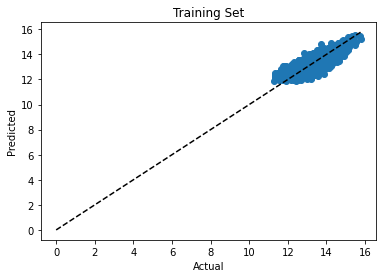

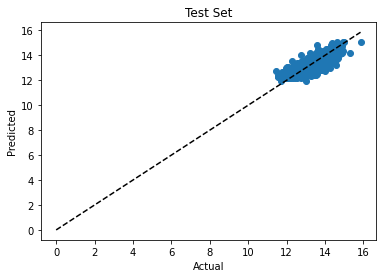

In [43]:
# Plot the actual vs predicted values for training set
plt.scatter(y_train, y_train_pred)
plt.plot([0, max(y_train)], [0, max(y_train)], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set')
plt.show()

# Plot the actual vs predicted values for test set
plt.scatter(y_test, y_test_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set')
plt.show()

The above model has the trained data set explaining 64.29% of the variation of price and the test set explaining 65.27%. Our model performed better because the test set performed better than the trained set. This is better than the previous models but not the best. We can procced with this model to be used in prediction and decision making.

In [44]:
# model five regression equation
print("Regression equation:")
print(f"y = {regressor.intercept_:.2f}", end="")
for i, coef in enumerate(regressor.coef_):
    if i == 0:
        continue
    feature_indices = poly.powers_[i]
    features = []
    for j, power in enumerate(feature_indices):
        if power > 0:
            features.append(f"{X_test.columns[j]}^{power}")
    if len(features) > 0:
        print(f" + {coef:.2f} * " + " * ".join(features), end="")
print()


Regression equation:
y = -15240.79 + -33.45 * bedrooms^1 + -25.05 * bathrooms^1 + 71.51 * floors^1 + 10.19 * grade^1 + 68.29 * waterfront^1 + -137.41 * condition^1 + 23.25 * yr_built^1 + -0.15 * sqft_lot^2 + -0.73 * sqft_lot^1 * bedrooms^1 + 1.57 * sqft_lot^1 * bathrooms^1 + -0.40 * sqft_lot^1 * floors^1 + 2.23 * sqft_lot^1 * grade^1 + -2.77 * sqft_lot^1 * waterfront^1 + -0.54 * sqft_lot^1 * condition^1 + -0.09 * sqft_lot^1 * yr_built^1 + -0.55 * bedrooms^2 + 0.79 * bedrooms^1 * bathrooms^1 + -0.55 * bedrooms^1 * floors^1 + -0.14 * bedrooms^1 * grade^1 + 2.22 * bedrooms^1 * waterfront^1 + -0.08 * bedrooms^1 * condition^1 + 0.04 * bedrooms^1 * yr_built^1 + -0.66 * bathrooms^2 + 2.78 * bathrooms^1 * floors^1 + -0.44 * bathrooms^1 * grade^1 + -1.53 * bathrooms^1 * waterfront^1 + -0.89 * bathrooms^1 * condition^1 + 0.02 * bathrooms^1 * yr_built^1 + -3.83 * floors^2 + -0.35 * floors^1 * grade^1 + -2.00 * floors^1 * waterfront^1 + -0.16 * floors^1 * condition^1 + -0.07 * floors^1 * yr_built^

The polynomial regression of degree 3 seems to perform better than degree 2 and 4. 

### Impact of the model to the real world problems.

* A predictive model that accurately estimates the sale price of houses in King County can help solve real-world problems by providing valuable insights to real estate agents, property developers, and homeowners. The model can help sellers and buyers set realistic expectations, and identify key features that have the most significant impact on the sale price. By investing strategically, property developers and homeowners can increase property values and support economic growth.
* There is always room for improvement when it comes to developing a predictive model for the King County House Sales dataset. One possible improvement is to incorporate additional variables that may impact the sale price, such as the presence of a garage or the quality of the school district. Another improvement could be to incorporate machine learning techniques to build a more robust and accurate model that can identify nonlinear relationships between variables. These improvements can help to provide even more accurate estimates of property values and support more informed decision-making in the real estate market.

### Findings


* Model five is the best model for price prediction in the King County House Sales dataset.
* The grade of the house has the highest correlation with the sale price, with a coefficient of 0.704877. This suggests that higher-quality homes with better overall construction and design tend to command higher prices in the King County housing market.

* The number of bedrooms, bathrooms, and floors also have relatively strong positive correlations with the sale price, with coefficients of 0.353289, 0.552219, and 0.313838, respectively. This indicates that larger and more spacious homes tend to be valued more highly than smaller and less spacious homes.
* The presence of a waterfront property also has a positive correlation with the sale price, although it is relatively weaker than other features, with a coefficient of 0.180529. This suggests that waterfront properties may be considered desirable by some buyers, but they are not universally sought-after and may not always command a significant price premium.
* The year built and condition of the house have relatively weak positive correlations with the sale price, with coefficients of 0.081958 and 0.039044, respectively. This suggests that while newer or better-maintained homes may command slightly higher prices than older or more poorly-maintained homes, these factors are not as important to buyers as other features such as size, quality, and location.

### Recommendations
* Adopting the model from the notebook to predict price using the predictor variables.
* Focus on improving the quality of the house - Given that the grade of the house has the highest correlation with the sale price, homeowners and property developers may want to focus on improving the quality of the home through renovations, upgrades, or better construction materials. This could include installing high-end appliances, upgrading flooring, adding energy-efficient windows or insulation, or redesigning the layout of the home to optimize space.
* Maximize the size and number of bedrooms and bathrooms - The number of bedrooms and bathrooms have relatively strong correlations with the sale price of houses in King County. Homeowners and property developers may want to consider adding additional bedrooms or bathrooms to maximize the value of the home. This could include converting existing space, such as a den or loft, into a bedroom or bathroom, or adding an extension to the house to create more living space.
* Keep the house well-maintained - Although the condition of the house has a relatively weak correlation with the sale price, it is still important to keep the home well-maintained to maximize its value.

### What next?
* Develop an action plan - Once the recommendations have been identified, the next step is to develop a detailed action plan that outlines specific steps to be taken to implement each recommendation.
* Prioritize recommendations - Depending on the available resources and time frame, it may be necessary to prioritize the recommendations in terms of their potential impact and feasibility.
* Monitor and adjust the plan - Once the action plan has been developed and implemented, it is important to monitor the results and make adjustments as needed.
* Evaluate the effectiveness of the recommendations - After the property has been sold, it is important to evaluate the effectiveness of the recommendations and assess whether they had the intended impact on the sale price of the property.
